Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

1. Write a function, select_kbest_freg_unscaled() that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.

2. Write a function, select_kbest_freg_scaled() that takes X_train, y_train (scaled) and k as input and returns a list of the top k features.

3. Write a function, ols_backware_elimination() that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.

4. Write a function, lasso_cv_coef() that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.

5. Write 3 functions, the first computes the number of optimum features (n) using rfe, the second takes n as input and returns the top n features, and the third takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features 
recursive_feature_elimination() that computes the optimum number of features (n) and returns the top n features.

### Set up environment

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import env
import wrangle
import split_scale

### Wrangle data

In [252]:
df = wrangle.wrangle_telco()

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1685 non-null object
total_charges      1685 non-null float64
monthly_charges    1685 non-null float64
tenure             1685 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 65.8+ KB


In [254]:
df.drop(columns=['customer_id'], inplace=True)

### View distributions

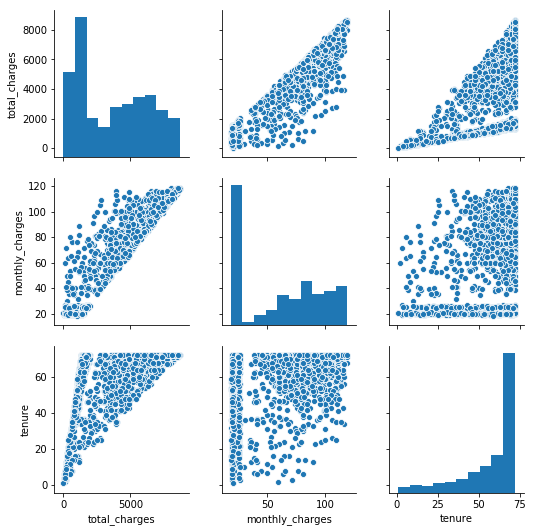

In [255]:
sns.pairplot(data=df)

### Split data

In [256]:
train, test = split_scale.split_my_data(data=df, train_ratio=.80, seed=123)

### Explore

### Scale

In [258]:
# impute a random column so we can test our feature engineering functions

scaler, train_scaled, test_scaled = \
    split_scale.standard_scaler(train, test)

### Feature Engineering

In [259]:
train['filler'] = -1
test['filler'] = -1

train_scaled['filler'] = 1
test_scaled['filler'] = 1

In [260]:
train_scaled.head()

,total_charges,monthly_charges,tenure,filler
120,-0.069496,-0.349191,0.839851,1
1423,-1.252726,-1.184789,-1.700684,1
389,1.017626,0.811120,0.839851,1
1137,-1.275844,-1.180459,-1.926509,1
1504,-0.763179,-1.036142,0.839851,1


#### 1. Select K Best

Write a function, select_kbest_freg_unscaled() that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.

In [172]:
# separate in to X and y dataframes

X_train = train.drop(columns=['total_charges'])
y_train = train[['total_charges']]

X_test = test.drop(columns=['total_charges'])
y_test = test[['total_charges']]

X_train_scaled = train_scaled.drop(columns=['total_charges'])
y_train_scaled = train_scaled[['total_charges']]

X_test_scaled = test_scaled.drop(columns=['total_charges'])
y_test_scaled = test_scaled[['total_charges']]

In [261]:
# required methods & functions

from sklearn.feature_selection import SelectKBest, f_regression

In [265]:
# to return top k features, I will use SelectKBest
# I will use f regression as my input function, because my data is continuous

from sklearn.feature_selection import SelectKBest, f_regression

# create selector object
f_selector = SelectKBest(f_regression, k=2)

# fit
f_selector.fit(X_train, y_train)

# # get the boolean values for each feature (whether to keep or not)
f_support = f_selector.get_support()
# f_support

# extract the feature names of those to keep (where support = True), and store in a list
f_feature = X_train.loc[:,f_support].columns.tolist()

# # print list of features
print(f_feature)

['monthly_charges', 'tenure']


In [266]:
# simplify the code a bit and prepare for variable input

k = 2

f_selector = SelectKBest(f_regression, k).fit(X_train, y_train).get_support()
f_feature = X_train.loc[:,f_selector].columns.tolist()

print(f_feature)

['monthly_charges', 'tenure']


In [267]:
def select_kbest_freg_unscaled(X_train, y_train, k):
    '''
    Takes unscaled data (X_train, y_train) and number of features to select (k) as input
    and returns a list of the top k features
    '''
    f_selector = SelectKBest(f_regression, k).fit(X_train, y_train).get_support()
    f_feature = X_train.loc[:,f_selector].columns.tolist()
    return f_feature

In [268]:
select_kbest_freg_unscaled(X_train, y_train, k=2)

['monthly_charges', 'tenure']

#### 2. Select K Best

Write a function, select_kbest_freg_scaled() that takes X_train, y_train (scaled) and k as input and returns a list of the top k features.


In [269]:
# this will be the same function! 
# this shows me the value of a function...I don't need to create a new function, 
# I just pass the original one different data

# this is what the function would look like as is:
def select_kbest_freg_scaled(X_train, y_train, k):
    '''
    Takes unscaled data (X_train, y_train) and number of features to select (k) as input
    and returns a list of the top k features
    '''
    f_selector = SelectKBest(f_regression, k).fit(X_train, y_train).get_support()
    f_feature = X_train.loc[:,f_selector].columns.tolist()
    return f_feature

In [270]:
select_kbest_freg_scaled(X_train_scaled, y_train_scaled, k)

['monthly_charges', 'tenure']

It should be clear now that 2 functions are not needed...this is why we write functions! Now we can do the same computations on different data without having to rewrite all the code. 

So, I will change the name of my original function so that it does not indicate scaled or unscaled. 

AND, I can now pass it scaled X and unscaled y if I wish.

In [271]:
def select_kbest_freg(X, y, k):
    '''
    dataframe of features (X),  dataframe of the target (y), and number of features to select (k) as input
    and returns a list of the top k features
    '''
    f_selector = SelectKBest(f_regression, k).fit(X, y).get_support()
    f_feature = X.loc[:,f_selector].columns.tolist()
    return f_feature

In [273]:
select_kbest_freg(X_train_scaled, y_train, k)

['monthly_charges', 'tenure']

#### 3. Backward elimination

takes scaled dataframes (X and y) as input and returns selected features based on the ols backwards elimination method.

In [275]:
import statsmodels.api as sm

# create the OLS object:
model = sm.OLS(y_train_scaled, X_train_scaled)

# fit the model:
fit = model.fit()

# summarize:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_charges   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.715e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:30:01   Log-Likelihood:                 296.25
No. Observations:                1348   AIC:                            -586.5
Df Residuals:                    1345   BIC:                            -570.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
monthly_charges     0.8224      0.006    140.883      0.000       0.811       0.834
tenure              0.2910      0.006     49.850      0.000       0.280       0.302
filler          -1.735e-16      0.005  -3.28e-14      1.000      -0.010       0.010
==============================================================================
Omnibus:                      262.952   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.404
Skew:                          -0.992   Prob(JB):                    2.06e-165
Kurtosis:                       6.093   Cond. No.                         1.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
# I'm going to take what was in the lesson and adapt as needed

cols = list(X_train_scaled.columns)

pmax = 1

# p = []
X_1 = X_train[cols]
# X_1.head()

model = sm.OLS(y_train,X_1).fit()

# model.pvalues
# model.pvalues.values
# # cols
# pd.Series(model.pvalues.values, index=cols)
# type(model.pvalues)

p = model.pvalues

pmax = max(p)

# pmax

feature_with_p_max = p.idxmax()

feature_with_p_max

# # pmax > 0.05
# print(cols.remove(feature_with_p_max))
# # cols


# if(pmax>0.05):
#     cols.remove(feature_with_p_max)
# else:
#     break

# cols

# selected_features_BE = cols
# print(selected_features_BE)

None


In [287]:
# now create a loop
cols = list(X_train_scaled.columns)
# pmax = 1

while (len(cols) > 0):
#     # create empty list to fill with p-value for each feature
#     p = []
    # create a new dataframe that we will use to train the model...each time we loop through it will 
    # remove the feature with the highest p-value IF that p-value is greater than 0.05.
    # if there are no p-values > 0.05, then it will only go through the loop one time. 
    X_1 = X_train[cols]
    # fit the Ordinary Least Squares Model
    model = sm.OLS(y_train,X_1).fit()
    # create a series of the pvalues with index as the feature names
    p = model.pvalues
    # get the max p-value
    pmax = max(p)
    # get the feature that has the max p-value
    feature_with_p_max = p.idxmax()
    # if the max p-value is >0.05, the remove the feature and go back to the start of the loop
    # else break the loop with the column names of all features with a p-value <= 0.05
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['monthly_charges', 'tenure', 'filler']


In [288]:
def ols_backward_elimination(X_train, y_train):
    '''
    Takes dataframe of features and dataframe of target variable as input,
    runs OLS, extracts each features p-value, removes the column with the highest p-value
    until there are no features remaining with a p-value > 0.05
    It then returns a list of the names of the selected features
    '''
    cols = list(X_train.columns)

    while (len(cols) > 0):
        # create a new dataframe that we will use to train the model...each time we loop through it will 
        # remove the feature with the highest p-value IF that p-value is greater than 0.05.
        # if there are no p-values > 0.05, then it will only go through the loop one time. 
        X_1 = X_train[cols]
        # fit the Ordinary Least Squares Model
        model = sm.OLS(y_train,X_1).fit()
        # create a series of the pvalues with index as the feature names
        p = pd.Series(model.pvalues)
        # get the max p-value
        pmax = max(p)
        # get the feature that has the max p-value
        feature_with_p_max = p.idxmax()
        # if the max p-value is >0.05, the remove the feature and go back to the start of the loop
        # else break the loop with the column names of all features with a p-value <= 0.05
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    selected_features_BE = cols
    return selected_features_BE

In [290]:
ols_backward_elimination(X_train_scaled, y_train_scaled)

['monthly_charges', 'tenure']

#### 4. LassoCV

Write a function, lasso_cv_coef() that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.

In [291]:
from sklearn.linear_model import LassoCV

In [293]:
reg = LassoCV().fit(X_train_scaled, y_train)

# print(reg.coef_)
# print(X_train_scaled.columns)

coef = pd.Series(reg.coef_, index=X_train_scaled.columns)

# print(coef)

monthly_charges    2113.119569
tenure              746.592142
filler                0.000000
dtype: float64


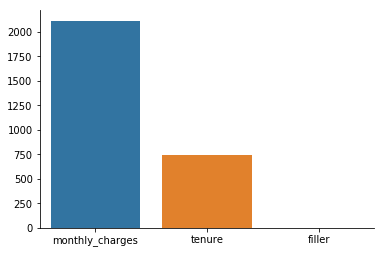

In [294]:
sns.barplot(x=X_train_scaled.columns, y=reg.coef_)

In [295]:
def lasso_cv_coef(X_train, y_train):
    '''
    Takes dataframe of features and dataframe of target variable as input,
    runs lassoCV and returns the coefficients for each feature
    and plots the features with their weights. 
    '''
    reg = LassoCV().fit(X_train, y_train)
    coef = pd.Series(reg.coef_, index=X_train.columns)
    p = sns.barplot(x=X_train.columns, y=reg.coef_)
    return coef, p

(monthly_charges    2113.119569
 tenure              746.592142
 filler                0.000000
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x1c236b1860>)

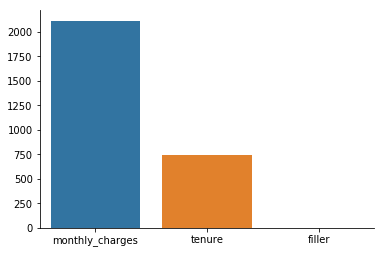

In [299]:
lasso_cv_coef(X_train_scaled, y_train)

#### 5. Blending the feature selection

Write 3 functions: 
1. computes the number of optimum features (n) using rfe    
2. takes n as input and returns the top n features   
3. takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# compute optimal number of features
# number of features must be between 1 and the number of possible features

features_range = range(1,len(X_train_scaled.columns)+1)
# list(features_range)

# # set "high score" to be the lowest possible score
high_score = 0

# # variables to store the feature list and number of features
number_of_features = 0
score_list = []

# # write the problem without a loop, but instead with all features available,
# # so feature count = len(X_train_scaled.columns)
n = len(X_train_scaled.columns)-1

model = LinearRegression()

rfe = RFE(model, n).fit(X_train_scaled, y_train)

# # transform of rfe will remove features that are least important to the number of features desired
train_rfe = rfe.transform(X_train_scaled)
# train_rfe

# # remove the same features from test
test_rfe = rfe.transform(X_test_scaled)

# # Now fit the model to our new dataset
model.fit(train_rfe, y_train)

# # get the model's "score" which is going to be R-squared value, or explained variance score
# # we can know this by looking at the documentation
# score = model.score(test_rfe, y_test)
# # score

# # append the score to a list of scores so that we can see which one performs the best
# score_list.append(score)
# # score_list

# # high_score
# # if score > high score then update the high score to be the new high score, and update number of 
# # features to be the current number
# if(score>high_score):
#     high_score = score
#     number_of_features = n
    
# print(high_score)
# print(n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
def optimal_number_of_features(X_train, y_train, X_test, y_test):
    '''discover the optimal number of features, n, using our scaled x and y dataframes, recursive feature
    elimination and linear regression (to test the performance with each number of features).
    We will use the output of this function (the number of features) as input to the next function
    optimal_features, which will then run recursive feature elimination to find the n best features
    '''
    features_range = range(1,len(X_train_scaled.columns)+1)
    # set "high score" to be the lowest possible score
    high_score = 0
    # variables to store the feature list and number of features
    number_of_features = 0
    score_list = []

    for n in features_range:
        model = LinearRegression()
        rfe = RFE(model,n).fit(X_train, y_train)
        
        # transform of rfe will remove features that are least important to the number of features desired
        train_rfe = rfe.transform(X_train)

        # remove the same features from test
        test_rfe = rfe.transform(X_test)

        # Now fit the model to our new dataset
        model.fit(train_rfe,y_train)

        # get the model's "score" which is going to be R-squared value, or explained variance score
        score = model.score(test_rfe,y_test)

        # append the score to a list of scores so that we can see which one performs the best
        score_list.append(score)

        # if score > high score then update the high score to be the new high score, and update number of 
        # features to be the current number

        if(score>high_score):
            high_score = score
            number_of_features = n
            
    return number_of_features

In [231]:
number_of_features = optimal_number_of_features(X_train_scaled, y_train, X_test_scaled, y_test)
number_of_features

2

Return the top n features   

In [235]:
cols = list(X_train.columns)
# cols 

model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, number_of_features)

#Transforming data using RFE
train_rfe = rfe.fit_transform(X_train,y_train)

#Fitting the data to model
model.fit(train_rfe,y_train)

temp = pd.Series(rfe.support_,index = cols)
# temp

selected_features_rfe = temp[temp==True].index
# selected_features_rfe

Index(['monthly_charges', 'tenure'], dtype='object')

In [248]:
def optimal_features(X_train, y_train, number_of_features):
    '''Taking the output of optimal_number_of_features, as n, and use that value to 
    run recursive feature elimination to find the n best features'''
    cols = list(X_train.columns)
    model = LinearRegression()
    
    #Initializing RFE model
    rfe = RFE(model, number_of_features)

    #Transforming data using RFE
    train_rfe = rfe.fit_transform(X_train,y_train)
    test_rfe = rfe.transform(X_test)
    
    #Fitting the data to model
    model.fit(train_rfe,y_train)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    
    X_train_new = pd.DataFrame(train_rfe, columns=selected_features_rfe)
    X_test_new = pd.DataFrame(test_rfe, columns=selected_features_rfe)
    
    return selected_features_rfe, X_train_new, X_test_new

In [249]:
my_features, new_train, new_test = optimal_features(X_train_scaled, y_train, number_of_features)

Take the list of the top n features as input and returns a new X_train and X_test dataframe with those top features